<a href="https://colab.research.google.com/github/andychiv/disneyland_analysis/blob/main/GSB_S521_01_Project_Version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul type="none">
  <li> Author: Andy Chiv, Shannon Weng </li>
  <li> Course: GSB 521-01 </li>
  <li> Date: February 28, 2023 </li>
</ul>

# Recommendation on the Optimal Disneyland Plan for Shorter Waiting Time in 1 Day

## Step 1: Introduction

For this project, my team is interested in understanding waiting time trends for various attractions at Disneyland theme park in California. In 2022,  Disneyland attracted as many as [18 million visitors](https://mickeyvisit.com/disneyland-busy-times-when-to-visit/#:~:text=Below%20see%20the%20complete%20Disneyland,those%20visitors%20create%20as%20possible.), the second most visited theme park after Disney World. With thousands of visitors flocking into the park every day, Disneyland's average wait times have also increased after the introduction of paid [Genie+ Program](https://www.disneydining.com/wait-times-have-increased-and-genie-is-to-blame-jb1/#:~:text=The%20reality%20is%2C%20wait%20times,in%20the%20same%20time%20frame.) in 2021, allowing visitors to virtually skip the lines. However, not many customers are enrolled in a such program since it is a paid service. Therefore, in this project, we would like to explore the potential optimal routes that reduce wait times compared the normal [conventional guide](https://nicolethenomad.com/2018/03/27/1-day-in-disneyland-the-best-route/). 




### Approach: 
In order to maximize visitors' time at Disneyland for a **one day** trip, we are considering the top 10 attractions given by www.thrill-data.com. It is also assumed that visitors can visit at least 6 attractions from 6 different lands in one day. So we will develope a model in finding the most optimal route based on time of the day to reduce their waiting time. 

### Top attractions for each land: 
- AdventureLand: Pirate of Carribeans
- New Orleans Square: Haunted Mansion
- Critter County: Splash Mountain
- Frontierland: Big Thunder Mt.Railroad
- Fantasyland: Teacups, It's a Small World, Matterhorn
- Tomorrowland: Space Mountain, Star Tours, Buzz Lightyear Astro Blasters

### Data Source:  
- Historical Data for major popular attractions are pulled from www.thrill-data.com where average wait times are calculated based on times directly from theme parks apps and user reporting.


## Step 2: Hypothesis

Our hypothesis is based on the fact that many visitors enter Disneyland based on the conventional guide, as displayed by the above map. Therefore, our hypothesis is: 

- Ho: The new Disney planning guide does not reduce the wait times compared to the conventional guide. 
- Ha: The new Disney planning guide reduces the wait times compared to the conventional guide. 

## Step 3: Data Extraction & Wrangling

In [29]:
# Import necessary library
import pandas as pd
import numpy as np
import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [30]:
# Data has been downloaded from thrill-data.com and stored in github for easy access
url1 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Big%20Thunder%20Mt.Railroad.csv"
url2 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Buzz%20Lightyear%20Astro%20Blasters.csv"
url3 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Haunted%20Mansion.csv"
url4 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/It%E2%80%99s%20a%20Small%20World.csv"
url5 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Mad%20Tea%20Party.csv"
url6 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Matterhorn%20Bobsleds.csv"
url7 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Pirates%20of%20the%20Carribean.csv"
url8 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Space%20Mountain.csv"
url9 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Splash%20Mountain.csv"
url10 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Star%20Tours.csv"

# Store all url links into a list
my_link = [url1, url2, url3, url4, url5, url6, url7, url8, url9, url10]

In [31]:
def read_multi_csv(list_of_link):
  # This function will read multiple url links and return a full dataframe
  
  # create an empty dataset
  myData = pd.DataFrame()
  for link in list_of_link:
    temp = pd.read_csv(link)
    myData = myData.append(temp)
  return myData


# Execute read_multi_csv function and store every dataframe into a single dataframe
data0 = read_multi_csv(my_link)
data0.head()

,Ride,Date.Time,Wait.Time
0,Big Thunder Mountain Railroad,2022-01-01 08:05:22,5
1,Big Thunder Mountain Railroad,2022-01-01 08:10:22,5
2,Big Thunder Mountain Railroad,2022-01-01 08:15:23,5
3,Big Thunder Mountain Railroad,2022-01-01 08:20:22,5
4,Big Thunder Mountain Railroad,2022-01-01 08:25:24,5


In [32]:
# Check the data type
data0.dtypes

Ride         object
Date.Time    object
Wait.Time     int64
dtype: object

In [33]:
# Verify the number of Ride: there are 10 rides as expected after we combine
data0['Ride'].unique()

array(['Big Thunder Mountain Railroad', 'Buzz Lightyear Astro Blasters',
       'Haunted Mansion', '"it\'s a small world"', 'Mad Tea Party',
       'Matterhorn Bobsleds', 'Pirates of the Caribbean',
       'Space Mountain', 'Splash Mountain',
       'Star Tours – The Adventures Continue'], dtype=object)

In [34]:
# Convert Date.Time to timestamp
data0['timestamp'] = pd.to_datetime(data0['Date.Time'], format='%Y-%m-%d %H:%M:%S')

# extract date and time components
data0['date'] = data0['timestamp'].dt.date
data0['time'] = data0['timestamp'].dt.time

# Drop the Date.Time Column since we no longer need it
data1 = data0.drop(columns=["Date.Time"])
data1.head()

,Ride,Wait.Time,timestamp,date,time
0,Big Thunder Mountain Railroad,5,2022-01-01 08:05:22,2022-01-01,08:05:22
1,Big Thunder Mountain Railroad,5,2022-01-01 08:10:22,2022-01-01,08:10:22
2,Big Thunder Mountain Railroad,5,2022-01-01 08:15:23,2022-01-01,08:15:23
3,Big Thunder Mountain Railroad,5,2022-01-01 08:20:22,2022-01-01,08:20:22
4,Big Thunder Mountain Railroad,5,2022-01-01 08:25:24,2022-01-01,08:25:24


Disneyland may have opening and closing hours depending on the day, week, month, and season. However, Disneyland typically opens the part at 8 AM and closes at 12 AM. We will consider this time intervals for the analysis. We also consider grouping the time interval in the following manner: 

- Early Morning: 8AM - 10 AM
- Late Morning: 10AM - 12PM
- Early Afternoon: 12PM - 2PM
- Later Afternoon: 3PM - 6PM 
- Evening:     6PM - 9PM
- Night: 9PM - 12 AM

In [35]:
bins = [7, 9, 11, 14, 17, 20, 24]
labels = ['Early Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night']
data1['time_group'] = pd.cut(data1['timestamp'].dt.hour, bins=bins, labels=labels, right = True)
data1

,Ride,Wait.Time,timestamp,date,time,time_group
0,Big Thunder Mountain Railroad,5,2022-01-01 08:05:22,2022-01-01,08:05:22,Early Morning
1,Big Thunder Mountain Railroad,5,2022-01-01 08:10:22,2022-01-01,08:10:22,Early Morning
2,Big Thunder Mountain Railroad,5,2022-01-01 08:15:23,2022-01-01,08:15:23,Early Morning
3,Big Thunder Mountain Railroad,5,2022-01-01 08:20:22,2022-01-01,08:20:22,Early Morning
4,Big Thunder Mountain Railroad,5,2022-01-01 08:25:24,2022-01-01,08:25:24,Early Morning
...,...,...,...,...,...,...
120101,Star Tours – The Adventures Continue,10,2023-01-01 00:35:06,2023-01-01,00:35:06,NaN
120102,Star Tours – The Adventures Continue,10,2023-01-01 00:40:04,2023-01-01,00:40:04,NaN
120103,Star Tours – The Adventures Continue,10,2023-01-01 00:45:08,2023-01-01,00:45:08,NaN
120104,Star Tours – The Adventures Continue,10,2023-01-01 00:50:06,2023-01-01,00:50:06,NaN


We will drop the NA value because a certain time stamp does not fall into any time group. 

In [36]:
# Count the number of NA values 
data1.isna().sum().sum()

8473

In [37]:
# Drop any row with NA value and store them into a new dataframe data2
data2 = data1.dropna(axis=0)
data2.isna().sum().sum()

0

In [38]:
data2

,Ride,Wait.Time,timestamp,date,time,time_group
0,Big Thunder Mountain Railroad,5,2022-01-01 08:05:22,2022-01-01,08:05:22,Early Morning
1,Big Thunder Mountain Railroad,5,2022-01-01 08:10:22,2022-01-01,08:10:22,Early Morning
2,Big Thunder Mountain Railroad,5,2022-01-01 08:15:23,2022-01-01,08:15:23,Early Morning
3,Big Thunder Mountain Railroad,5,2022-01-01 08:20:22,2022-01-01,08:20:22,Early Morning
4,Big Thunder Mountain Railroad,5,2022-01-01 08:25:24,2022-01-01,08:25:24,Early Morning
...,...,...,...,...,...,...
120089,Star Tours – The Adventures Continue,10,2022-12-31 23:35:05,2022-12-31,23:35:05,Night
120090,Star Tours – The Adventures Continue,10,2022-12-31 23:40:09,2022-12-31,23:40:09,Night
120091,Star Tours – The Adventures Continue,10,2022-12-31 23:45:06,2022-12-31,23:45:06,Night
120092,Star Tours – The Adventures Continue,10,2022-12-31 23:50:05,2022-12-31,23:50:05,Night


In [39]:
# Extract day of the week of the timestamp
data2['day_index'] = data2["timestamp"].dt.weekday
# Convert integer to day of the week string
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data2['day_of_week'] = data2['day_index'].apply(lambda x: days[x])

data3 = data2[["Ride", "date", "time", "day_of_week", "time_group", "Wait.Time"]]
data3.head()

<ipython-input-39-e2d373548a10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['day_index'] = data2["timestamp"].dt.weekday
<ipython-input-39-e2d373548a10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['day_of_week'] = data2['day_index'].apply(lambda x: days[x])


,Ride,date,time,day_of_week,time_group,Wait.Time
0,Big Thunder Mountain Railroad,2022-01-01,08:05:22,Saturday,Early Morning,5
1,Big Thunder Mountain Railroad,2022-01-01,08:10:22,Saturday,Early Morning,5
2,Big Thunder Mountain Railroad,2022-01-01,08:15:23,Saturday,Early Morning,5
3,Big Thunder Mountain Railroad,2022-01-01,08:20:22,Saturday,Early Morning,5
4,Big Thunder Mountain Railroad,2022-01-01,08:25:24,Saturday,Early Morning,5


Disneyland park may operate the annual 24-hour party, making some attractions open longer than their usual time (from 6am until 6am. Therefore, we are considering only time from 8am until 12am for this analysis. Those time cannot be categorized, resulting in Null value. Thus we will remove them. 

In [42]:
# Group by Ride and Time_group and calculate the average waiting time
data4 = pd.DataFrame(data3.groupby(['Ride', 'time_group'])['Wait.Time'].mean())
data4 = data4.reset_index()
data4.head()

,Ride,time_group,Wait.Time
0,"""it's a small world""",Early Morning,5.170066
1,"""it's a small world""",Late Morning,14.283388
2,"""it's a small world""",Early Afternoon,21.403927
3,"""it's a small world""",Late Afternoon,19.888773
4,"""it's a small world""",Evening,14.417553


# Step 4: Data Visualization:

## Heatmap Plot Showing the Average Wait Time for the Top 10 Attractions at Different Time Group

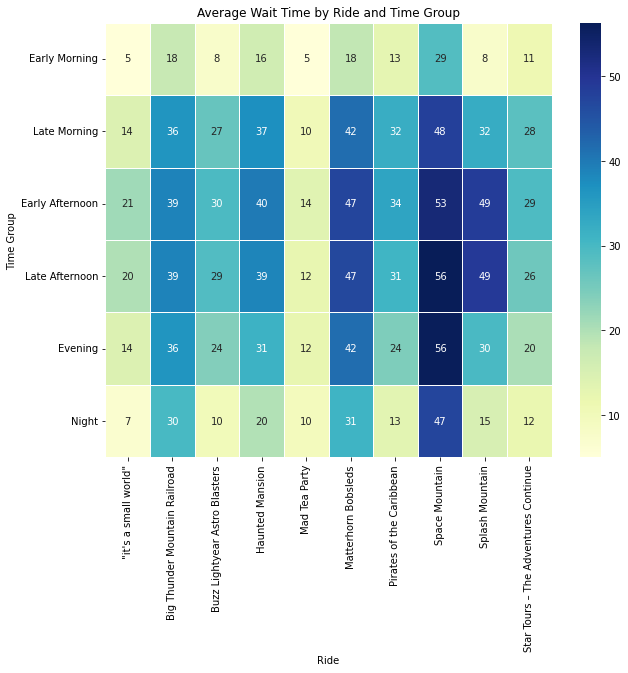

In [44]:
# create pivot table
data5 = data3.pivot_table(index='time_group', columns='Ride', values='Wait.Time', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data5, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, ax=ax)
ax.set_title('Average Wait Time by Ride and Time Group')
ax.set_xlabel('Ride')
ax.set_ylabel('Time Group')
plt.show()

The heatmap above shows the average wait time for every attraction for a specific time group.

**Top 5 attractions** that have the highest wait time are positioned on the left side including: 
- Space Mountain, 
- Splash Mountain
- Matterhorn Bobsleds and 
- Big Thunder Mountain Railroad
- Haunted Mansion

**Top 3 Time Groups** that are the most crowded are
- Late Morning
- Early Afternoon 
- Late Aternoon


# Step 5: Next Step

- We are still in processing of finding the optimal route using permutation algorithm. 
- Find the top 5 optimal routes and perform T-test Compared to the conventional planning guide
- Other open questions we would like to see: 
  - if there is a difference between weekdays vs weekend wait time and how our optimal will change depending on the day or season. 